In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
from statistics import stdev, mean
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import numpy as np
import random
import scipy
import math
import copy
import csv

Введите путь к файлу: 
/Users/evgeniakiseleva/Desktop/tt6_2.csv

Вы импортировали: 
        №      цена  площадь  до метро     год  нравится  этаж
№                                                            
1    1.0  270000.0    148.0       5.0  2004.0       7.0   2.0
2    2.0  270000.0    150.0       5.0  2004.0       7.0   2.0
3    3.0  200000.0    120.0       4.0  2001.0       8.0   2.0
4    4.0  100000.0     56.0       1.0  1929.0       5.0   3.0
5    5.0  270000.0    147.0       7.0  2004.0       7.0   2.0
6    6.0  160000.0     55.0      12.0  2019.0       6.0   2.0
7    7.0  120000.0     54.0       5.0  1932.0       4.0   4.0
8    8.0  250000.0     65.0       1.0  1929.0       5.0   5.0
9    9.0  130000.0    134.0      10.0  1947.0       9.0   6.0
10  10.0  245000.0     72.0       8.0  1979.0      10.0   5.0
11  11.0  210000.0     84.0       9.0  1933.0       5.0  11.0
12  12.0  126000.0     98.0       2.0  1954.0       9.0   8.0
13  13.0  110000.0    123.0      15.0  1967.0  

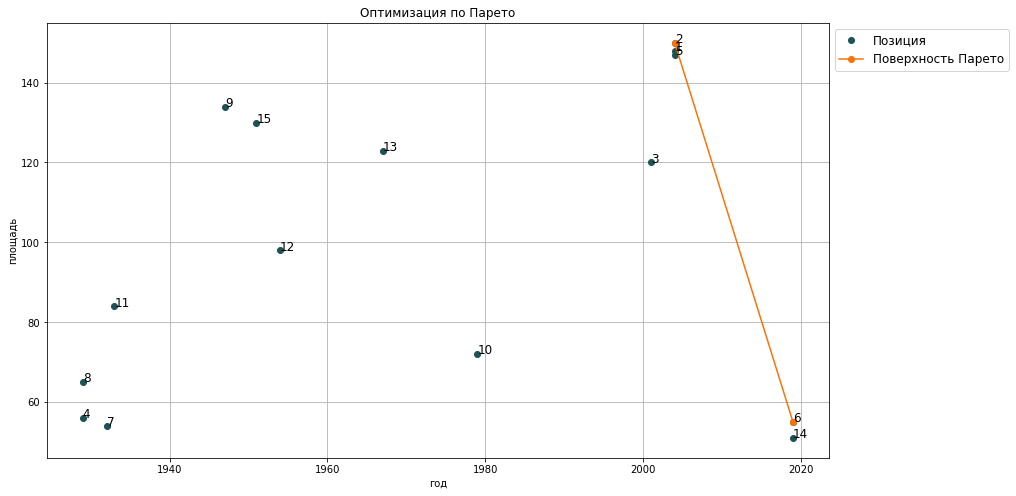


Нормированные данные: 
            №      цена   площадь  до метро       год  нравится      этаж
№                                                                       
1   0.066667  1.000000  0.986667  0.333333  0.992571       0.7  0.181818
2   0.133333  1.000000  1.000000  0.333333  0.992571       0.7  0.181818
3   0.200000  0.740741  0.800000  0.266667  0.991085       0.8  0.181818
4   0.266667  0.370370  0.373333  0.066667  0.955423       0.5  0.272727
5   0.333333  1.000000  0.980000  0.466667  0.992571       0.7  0.181818
6   0.400000  0.592593  0.366667  0.800000  1.000000       0.6  0.181818
7   0.466667  0.444444  0.360000  0.333333  0.956909       0.4  0.363636
8   0.533333  0.925926  0.433333  0.066667  0.955423       0.5  0.454545
9   0.600000  0.481481  0.893333  0.666667  0.964339       0.9  0.545455
10  0.666667  0.907407  0.480000  0.533333  0.980188       1.0  0.454545
11  0.733333  0.777778  0.560000  0.600000  0.957405       0.5  1.000000
12  0.800000  0.466667  0.

In [10]:
def input_data():
    
    """Формирование исходных данных
    
    Функция считывает csv файл и формирует массивы с 
    введенными пользователем данными, включающими имена критериев,
    по которым осуществляется оптимизация, направления оптимизации
    для каждого критерия и весовые коэффициенты.
    
    """
    
    def import_csv():
        """Метод считывает данные из CSV файла и преобразует их в DataFrame."""
        try:
            with open(input('Введите путь к файлу: \n'), encoding='utf-8-sig') as data_file:
                csv = []
                A = []
                for line in data_file:
                    csv = line.strip().split(';')
                    for n, x in enumerate(csv):
                        if ',' in x:
                            csv = list(map(lambda x: float(x.replace(',', '.'))))
                        else:
                            try:
                                csv[n] = float(x)
                            except:
                                pass
                    
                    A.append(csv)
                A = pd.DataFrame(A[1:], 
                                 columns=A[0], 
                                 index=[i for i in range(1, len(A))])
                A.index.name = '№'
                print('\nВы импортировали: \n', A)
            return A
        except FileNotFoundError:
            print('Искомый файл не найден! Попробуйте еще раз: \n')
            return import_csv()


    def input_num_criteria(A):
        """Ввод пользователем количества критериев, по которым осуществляется оптимизация."""
        try:
            number = int(input('\nСколько критериев оптимизировать? '))
            if number < 2:
                print('Количество критериев должно быть не менее 2-х!')
                return input_num_criteria(A)
            else: 
                return number
        except:
            print('Количество должно быть числом!')
            return input_num_criteria(A)


    def input_name_criteria(A):
        """Ввод пользователем имен критериев, по которым осуществляется оптимизация."""
        name = input('\nНазвание критерия: ')
        if name not in A.columns:
            print('Такого критерия нет!\nПроверьте правильность написания и попробуйте еще раз')
            return input_name_criteria(A)
        return name


    def input_direction_of_optimiz(A):
        """Ввод пользователем направлений оптимизации для каждого критерия."""
        direction = input('Направление ("макс" или "мин"): ')
        direction = direction.replace(' ', '')
        direction = direction.upper()
        if direction not in ('МАКС', 'МИН'):
            print('Ошибка ввода!\nВведите значение "макс" или "мин"')
            return input_direction_of_optimiz(A)
        return direction
    
    
    def input_weight_coeff(A):
        """Ввод пользователем весовых коэффициентов характеристик."""
        try:
            weight = input('Важность (от 1 до 10): ')
            if weight == '':
                return None
            else:
                if ',' in weight:
                    weight = weight.replace(',', '.')
                return float(weight)
        except:
            print('Вес должен быть числом! Попробуйте еще раз')
            return input_weight_coeff(A)
    
    
    def optimiz_criteria(A):
        """Создание списка критериев, по которым осуществляется оптимизация."""
        list_optimiz_criteria = []
        number = input_num_criteria(A)
        lin_conv = True
        for i in range(number):
            name_criteria = input_name_criteria(A)
            direction_of_optimiz = input_direction_of_optimiz(A)
            weight_coeff = input_weight_coeff(A)
            list_optimiz_criteria.append([name_criteria, direction_of_optimiz, weight_coeff])
            if weight_coeff is None:
                lin_conv = None
        return number, list_optimiz_criteria, lin_conv
    
    
    def input_ideal_point(data):
        """Ввод пользователем идеальной точки."""
        
        def input_value(data, i):
            """Функция для заполнения массива значений идеальной точки."""
            try:
                value = float(input(f'Значение по столбцу {i}: '))
                return value
            except:
                print('Значение должно быть числом! Попробуйте еще раз')
                return input_value(data, i)
        
        inpt = input("\nЕсть идеальная точка? ('да' или 'нет'): ")
        inpt = inpt.replace(' ', '')
        inpt = inpt.upper()
        if inpt not in ('ДА', 'НЕТ'):
            print('Введите "да" или "нет"!')
            return input_ideal_point()
        else:
            if inpt == 'ДА':
                ideal_point = []
                for i in data:
                    if i != '№':
                        value = input_value(data, i)
                        ideal_point.append(value)
            else:
                ideal_point = None
        return ideal_point
    
    
    data = import_csv()
    number_optimize_criteria, list_optimiz_criteria, lin_conv = optimiz_criteria(data)
    ideal_point = input_ideal_point(data)
    return data, number_optimize_criteria, list_optimiz_criteria, ideal_point, lin_conv


def graph_pareto(data, number_optimize_criteria, criteria):
    
    """Построение графиков
    
    Метод строит точечную диаграмму для двухкритериальной оптимизации по Парето
    и липестковую диаграмму для многокритериальной задачи.
    
    """
    
    def opt(i, j, criteria):
        """Метод проверяет точку на вхождение в набор оптимальных по Парето."""
        if criteria == 'МИН':
            if j <= i:
                return False
            else:
                return True
        elif criteria == 'МАКС':
            if j >= i:
                return False
            else:
                return True
    
    
    def pareto_surface(data, criteria):
        """Метод находит набор точек поверхности Парето."""
        optimal_point_x = []
        optimal_point_y = []
        index_optimal_point = []
        k = True
        for n, i in enumerate(data[criteria[0][0]], start=1):
            for num in range(1, len(data[criteria[0][0]]) + 1):
                if (i == data[criteria[0][0]][num]) and (data[criteria[1][0]][n] == data[criteria[1][0]][num]):
                    continue
                optimal_x = opt(i, data[criteria[0][0]][num], criteria[0][1])
                optimal_y = opt(data[criteria[1][0]][n], data[criteria[1][0]][num], criteria[1][1])
                if (optimal_x == False) and (optimal_y == False):
                    k = False
                    break
            if k == True:
                optimal_point_x.append(i)
                optimal_point_y.append(data[criteria[1][0]][n])
                index_optimal_point.append(n)
            k = True
        row = list(set([i for i in range(1, len(data) + 1)]) ^ set(index_optimal_point))
        return data.drop(row, axis=0)
    
    
    def graph_for_two_criteria(data, criteria, Pareto_surface):
        """Метод строит точечную диаграмму для двухкритериальной оптимизации по Парето."""
        plt.figure(figsize=(14, 8))
        x = data[criteria[0][0]]
        y = data[criteria[1][0]]
        plt.plot(x, y, 'o',
                    color='#1e5356',
                    label="Позиция")

        for i in data[data.columns[0]]:
            plt.annotate(int(i), (data[criteria[0][0]][i], data[criteria[1][0]][i]), fontsize=12)

        Pareto_surface = Pareto_surface.sort_values(by=criteria[0][0])
        plt.plot(Pareto_surface[criteria[0][0]], 
                 Pareto_surface[criteria[1][0]],
                 'o-',
                 color='#F97306',
                 label="Поверхность Парето")
        
        plt.title('Оптимизация по Парето')
        plt.xlabel(criteria[0][0])
        plt.ylabel(criteria[1][0])
        plt.grid()
        plt.legend(fontsize=12,
                   bbox_to_anchor=(1, 1))
        plt.show()
    
    Pareto_surface = pareto_surface(data, criteria)
    print('\n\nТочки поверхности Парето:\n', Pareto_surface)
    
    if number_optimize_criteria == 2:
        graph_for_two_criteria(data, criteria, Pareto_surface)


def data_normalization(data):
    """Функция нормирует исходные данные."""
    for col in data[1:]:
        mean = data[col].max()
        for i in data.index:
            data[col][i] = float(data[col][i] / mean)
    return data


def linear_convolution(i_data, data, number, criteria):
    
    """Линейная свертки критериев
    
    Функция, используя линейную свертку, возвращает потимальное значение,
    диаграмму линейной свертки критериев и набор точек поверхности Парето.
    
    """
    
    def fun(cr):
        """Функция возвращает множитель, формирующий элемент линейной свертки."""
        if cr == 'МИН':
            return -1
        elif cr == 'МАКС':
            return 1
    
    
    def convolution_matrix(data, criteria):
        """Функция возвращает таблицу линейной свертки для двух оптимизационных критериев."""
        x = [i/10 for i in range(0, 11)]
        y = [i/10 for i in range(10, -1, -1)]
        name_columns = ['/'.join(map(str, lst)) for lst in list(zip(x, y))]

        row = []
        lin_conv = []
        for i in data.index:
            for n in range(len(x)):
                value = fun(criteria[0][1]) * x[n] * data[criteria[0][0]][i] + fun(criteria[1][1]) * y[n] * data[criteria[1][0]][i]
                row.append(value)
            lin_conv.append(row)
            row = []

        lin_conv = pd.DataFrame(lin_conv,
                                columns=name_columns,
                                index=[i for i in range(1, len(lin_conv) + 1)])
        return lin_conv, name_columns
    
    
    def output(data, lin_conv):
        """Функция выводит оптимальные значения на экран (для оптимизации двух критериев)."""
        print('\nОптимальные значения:\n')
        for i in lin_conv:
            for n, value in enumerate(lin_conv[i], start=1):
                if value == lin_conv[i].max():
                    print(f'При важности {i} оптимальный выбор под номером - {n}')
    
    
    def graph_linear_convolution(lin_conv, name_columns):
        """Функция строит диаграмму линейной свертки критериев (для оптимизации двух критериев)."""
        lin_conv = lin_conv.T
        lin_conv['name'] = name_columns
        
        lin_conv.plot(x='name',
                      kind='bar',
                      stacked=False,
                      title="Линейная свертка критериев",
                      width=0.7,
                      xlabel='Весовые коэффициенты',
                      ylabel='Значение',
                      figsize=(15,8)
                     )
        
        del lin_conv['name']
        lin_conv = lin_conv.T
        x = np.arange(0, 11)
        answr = [max(lin_conv[i]) for i in lin_conv]
        plt.plot(x, answr, label = 'Оптимальные значения', c = 'm')
        
        plt.legend(fontsize=10, 
                        ncol=1, 
                        bbox_to_anchor=(1, 1)
                       )
        plt.grid()
    
    
    def convolution_more_2_cr(i_data, data, criteria):
        
        """Линейная свертка (более 2-х критериев)
        
        Функция возвращает таблицу линейной свертки 
        и оптимальное значение для более двух оптимизационных критериев.
        
        """
        
        criteria_list = []
        for i in range(len(criteria)):
            criteria_list.append(criteria[i][2])
        
        for i in range(len(criteria)):
            value = fun(criteria[i][1]) * criteria[i][2] / sum(criteria_list)
            criteria[i].append(value)
        
        norm_criteria_list = []
        for i in data.index:
            value = 0
            for j in range(len(criteria)):
                value += criteria[j][3] * data[criteria[j][0]][i]
            norm_criteria_list.append(value)
        
        data['Свертка'] = list(map(lambda x: round(x, 4), norm_criteria_list))
        print('Линейная свертка:\n', data)
        print('\nОптимальное значение:\n', i_data.iloc[[norm_criteria_list.index(max(norm_criteria_list))]]) 
        
        
    if number == 2:
        lin_conv, name_columns = convolution_matrix(data, criteria)
        print('Линейная свертка: \n', lin_conv)
        output(data, lin_conv)
        graph_linear_convolution(lin_conv, name_columns)
    else:
        convolution_more_2_cr(i_data, data, criteria)
        

def meth_ideal_point(i_data, data, criteria, ideal_point):
    
    """Метод идеальной точки
    
    Функция расчитывает оптимальное значение методом идеальной точки
    и формирует лепестковую диаграмму указанием Паретооптимального множества решений.
    
    """
    
    norm_meth_ideal_point = []
    row = []
    
    #print('criteria  ', criteria)
    for i in i_data.index:
        for num, j in enumerate(criteria, start=0):
            #print('num ', num)
            if criteria[num][1] == 'МИН':
                value = 1 / ((ideal_point[num] - i_data[criteria[num][0]][i]) / ideal_point[num])
            else:
                value = (ideal_point[num] - i_data[criteria[num][0]][i]) / ideal_point[num]
            row.append(value)
        norm_meth_ideal_point.append(row)
        row = []
    
    distance = []
    for row in norm_meth_ideal_point:
        value = 0
        for i in row:
            value += i**2
        distance.append(value)
    
    print('Оптимальное значение: \n', i_data.iloc[[distance.index(min(distance))]])
    
    
    
    


data, number_optimize_criteria, list_optimiz_criteria, ideal_point, lin_conv = input_data()

# Парето
print('\n\n', 'Поиск Паретооптимального решения'.center(60))
graph_pareto(data, number_optimize_criteria, list_optimiz_criteria)

# Нормирование данных
data_norm = data_normalization(data.copy())
print('\nНормированные данные: \n', data_norm)

# Линейная оптимизация
print('\n\n', 'Линейная свертка критериев'.center(60), '\n\n')
if lin_conv is None:
    print('Линейная оптимизация недоступна, поскольку не были введены весовые коэффициенты или данных недостаточно.')
else:
    linear_convolution(data, data_norm, number_optimize_criteria, list_optimiz_criteria)

# Метод идеальной точки
print('\n\n', 'Метод идеальной точки'.center(60), '\n\n')
if ideal_point is not None:
    meth_ideal_point(data, data_norm, list_optimiz_criteria, ideal_point)
else:
    print('Оптимизация методом идеальной точки недоступна, поскольку идеальная точка не была введена.')

In [ ]:
CSV UTF-8 (разделитель)